In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
from pyuvdata import uvutils
from hera_qm import ant_metrics
import hera_cal

In [2]:

data_file_list = ['/data6/HERA/data/2458042/zen.2458042.12552.xx.HH.uv','/data6/HERA/data/2458042/zen.2458042.12552.yy.HH.uv','/data6/HERA/data/2458042/zen.2458042.12552.yx.HH.uv','/data6/HERA/data/2458042/zen.2458042.12552.xy.HH.uv']

uv = UVData()

uv.read_miriad(data_file_list)


Combined polarizations are not evenly spaced. This will make it impossible to write this data out to some file types.


In [3]:

aa = hera_cal.utils.get_aa_from_uv(uv)

info = hera_cal.omni.aa_to_info(aa)


In [4]:

antpos = uv.antenna_positions+uv.telescope_location

antpos = uvutils.ENU_from_ECEF(antpos.T,*uv.telescope_location_lat_lon_alt).T


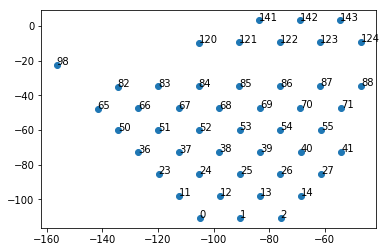

In [5]:

plt.figure('Antenna Positions')

plt.plot(antpos[:,0],antpos[:,1],'o')

for i, txt in enumerate(uv.antenna_numbers):
    
    plt.annotate(txt,antpos[i,0:2])

plt.show()

In [ ]:

reds = info.get_reds()

am = ant_metrics.Antenna_Metrics(data_file_list, reds, fileformat = 'miriad')

am.iterative_antenna_metrics_and_flagging(crossCut = 5,deadCut = 5)

print uv.antenna_positions[46]


In [7]:

def plot_metric(metrics, ants=None, antpols=None, title='', ylabel='Modified z-Score', xlabel=''):
    
    if ants is None:
        
        ants = list(set([key[0] for key in metrics.keys()]))
        
    if antpols is None:
        
        antpols = list(set([key[1] for key in metrics.keys()]))
        
    for antpol in antpols:
        
        for i,ant in enumerate(ants):
            
            metric = 0
            
            if metrics.has_key((ant,antpol)):
                
                metric = metrics[(ant,antpol)]
                
            plt.plot(i,metric,'.')
            
            plt.annotate(str(ant) + antpol, xy = (i,metrics[(ant,antpol)]))
            
        plt.gca().set_prop_cycle(None)
        
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()
        

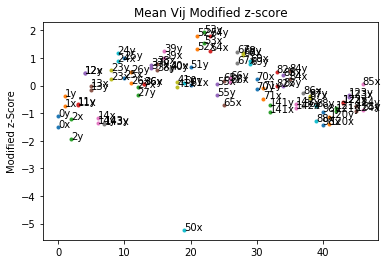

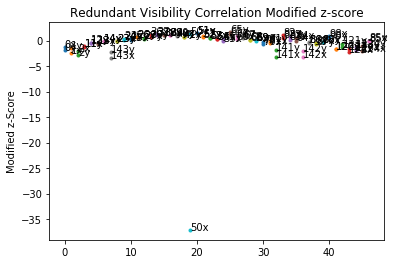

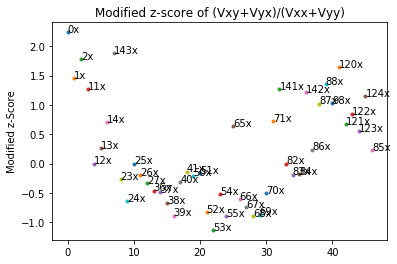

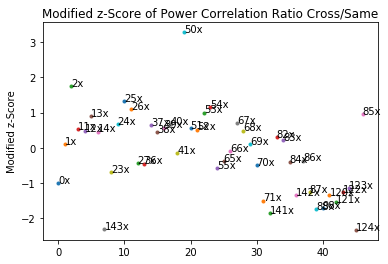

In [8]:

plt.figure()

plot_metric(am.finalModzScores['meanVij'],title='Mean Vij Modified z-score')

plt.figure()

plot_metric(am.finalModzScores['redCorr'],title = 'Redundant Visibility Correlation Modified z-score')

plt.figure()

plot_metric(am.finalModzScores['meanVijXPol'],antpols = ['x'], title = 'Modified z-score of (Vxy+Vyx)/(Vxx+Vyy)')

plt.figure()

plot_metric(am.finalModzScores['redCorrXPol'], antpols = ['x'], title = 'Modified z-Score of Power Correlation Ratio Cross/Same')


In [9]:
ant_metrics.get_ant_metrics_dict()

{'ant_metrics_crossed_ants': 'Antennas deemed to be cross-polarized by hera_qm.ant_metrics.',
 'ant_metrics_dead_ants': 'Antennas deemed to be dead by hera_qm.ant_metrics.',
 'ant_metrics_meanVij': 'Mean of the absolute value of all visibilities associated with an antenna.',
 'ant_metrics_meanVijXPol': 'Ratio of mean cross-pol visibilities to mean same-pol visibilities: (Vxy+Vyx)/(Vxx+Vyy).',
 'ant_metrics_mod_z_scores_meanVij': 'Modified z-score of the mean of the absolute value of all visibilities associated with an antenna.',
 'ant_metrics_mod_z_scores_meanVijXPol': 'Modified z-score of the ratio of mean cross-pol visibilities to mean same-pol visibilities: (Vxy+Vyx)/(Vxx+Vyy).',
 'ant_metrics_mod_z_scores_redCorr': 'Modified z-score of the extent to which baselines involving an antenna do not correlate with others they are nominally redundant with.',
 'ant_metrics_mod_z_scores_redCorrXPol': 'Modified z-score of the mean correlation ratio between redundant visibilities and singlely-

In [10]:
print reds

[[(23, 71), (36, 87), (37, 88), (65, 122), (66, 123), (67, 124), (82, 142), (83, 143)], [(41, 50), (55, 65), (86, 98), (71, 82)], [(0, 70), (1, 71), (11, 86), (12, 87), (36, 121), (37, 122), (38, 123), (39, 124), (51, 141), (52, 142), (53, 143), (13, 88)], [(0, 14), (11, 26), (23, 39), (24, 40), (25, 41), (37, 54), (38, 55), (50, 68), (51, 69), (52, 70), (65, 84), (66, 85), (67, 86), (120, 142), (121, 143), (12, 27), (36, 53), (53, 71), (68, 87), (69, 88)], [(0, 27), (11, 40), (12, 41), (23, 54), (24, 55), (36, 69), (38, 71), (50, 85), (51, 86), (52, 87), (53, 88), (82, 121), (83, 122), (84, 123), (85, 124), (37, 70)], [(0, 1), (1, 2), (11, 12), (12, 13), (13, 14), (23, 24), (24, 25), (25, 26), (26, 27), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (82, 83), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (120, 121), (121, 122), (122, 123), (123, 124), (141, 142), (142, 

In [11]:
z_scores = ant_metrics.red_corr_metrics(uv,['xx','xy','yx','yy'],['x','y'],uv.antenna_numbers,reds,am.xants)

In [12]:
rawRed = ant_metrics.red_corr_metrics(uv,['xx','xy','yx','yy'],['x','y'],uv.antenna_numbers,reds,am.xants,rawMetric = True)

In [13]:
ant_metrics.mean_Vij_cross_pol_metrics(uv,['xx','xy','yx','yy'],['x','y'],uv.antenna_numbers,uv.get_antpairs(),am.xants)

{(0, 'x'): 2.2372431554288803,
 (0, 'y'): 2.2372431554288803,
 (1, 'x'): 1.455270867336192,
 (1, 'y'): 1.455270867336192,
 (2, 'x'): 1.7865445328927758,
 (2, 'y'): 1.7865445328927758,
 (11, 'x'): 1.2717442727479737,
 (11, 'y'): 1.2717442727479737,
 (12, 'x'): -0.00014151028331630175,
 (12, 'y'): -0.00014151028331630175,
 (13, 'x'): 0.26659899394588193,
 (13, 'y'): 0.26659899394588193,
 (14, 'x'): 0.70770993460266107,
 (14, 'y'): 0.70770993460266107,
 (23, 'x'): -0.25872768493504361,
 (23, 'y'): -0.25872768493504361,
 (24, 'x'): -0.64118493395180609,
 (24, 'y'): -0.64118493395180609,
 (25, 'x'): 0.0001415102833171345,
 (25, 'y'): 0.0001415102833171345,
 (26, 'x'): -0.20162619392952336,
 (26, 'y'): -0.20162619392952336,
 (27, 'x'): -0.33413370625710864,
 (27, 'y'): -0.33413370625710864,
 (36, 'x'): -0.45944195505097535,
 (36, 'y'): -0.45944195505097535,
 (37, 'x'): -0.48297118502651032,
 (37, 'y'): -0.48297118502651032,
 (38, 'x'): -0.67045170635212914,
 (38, 'y'): -0.67045170635212914,


In [14]:
ant_metrics.mean_Vij_cross_pol_metrics(uv,['xx','xy','yx','yy'],['x','y'],uv.antenna_numbers,uv.get_antpairs(),am.xants,rawMetric = True)

{(0, 'x'): 0.52129785433402953,
 (0, 'y'): 0.52129785433402953,
 (1, 'x'): 0.46917059026912344,
 (1, 'y'): 0.46917059026912344,
 (2, 'x'): 0.49125371278531493,
 (2, 'y'): 0.49125371278531493,
 (11, 'x'): 0.45693647480914046,
 (11, 'y'): 0.45693647480914046,
 (12, 'x'): 0.37215095608675153,
 (12, 'y'): 0.37215095608675153,
 (13, 'x'): 0.38993221625733382,
 (13, 'y'): 0.38993221625733382,
 (14, 'x'): 0.41933723077724677,
 (14, 'y'): 0.41933723077724677,
 (23, 'x'): 0.35491327386340554,
 (23, 'y'): 0.35491327386340554,
 (24, 'x'): 0.32941818878607959,
 (24, 'y'): 0.32941818878607959,
 (25, 'x'): 0.37216982259652093,
 (25, 'y'): 0.37216982259652093,
 (26, 'x'): 0.35871973164390403,
 (26, 'y'): 0.35871973164390403,
 (27, 'x'): 0.34988661288654838,
 (27, 'y'): 0.34988661288654838,
 (36, 'x'): 0.34153340616317329,
 (36, 'y'): 0.34153340616317329,
 (37, 'x'): 0.33996491786396488,
 (37, 'y'): 0.33996491786396488,
 (38, 'x'): 0.32746722863510003,
 (38, 'y'): 0.32746722863510003,
 (39, 'x'): 0.31

In [15]:

count = 0 

for i in reds:
    for j in i: 
        count += 1
        
print count 


1061


In [19]:
print uv.Nbls

1128


In [17]:

values = []

for key in z_scores.keys():
    
    values.append(z_scores[key]) 

print values

[1.0485916412961869, -1.1937483966979339, 0.25865142836338489, 0.37629985431730512, -0.3814116608026008, -1.98188416447898, 0.69706962527988614, -0.49668260381826979, 0.84555061007330634, -0.63669979208307204, 1.276240657868406, 0.49681558388285446, 0.57619298363080584, 1.076293377676941, 0.43077348489225531, -0.61432326115206537, 0.29535671982124462, -1.2623855344036599, -1.1217992945111162, -2.0727286071677127, 0.13361363094245657, 0.97353598026750465, 1.5144461355043188, -0.31488058436795774, -0.28988365675056232, 0.4445566193502562, -1.3892256710552382, 0.35803215177757408, 0.84561548891196958, -0.81998110998268225, 1.4665751473861433, -2.3187269871692759, 0.14987579153159092, 0.31865823325607917, -1.5880859430974072, 1.0654132450682798, 0.13433165038577491, 1.1947774500972845, -0.65856208675142358, 0.67449999999999999, -0.49794277600703563, 0.009319531876193235, -1.2194248219474617, -0.46956570245008089, -1.5432324104827424, -0.23847805300118993, 0.79611926016339352, -2.7519190280

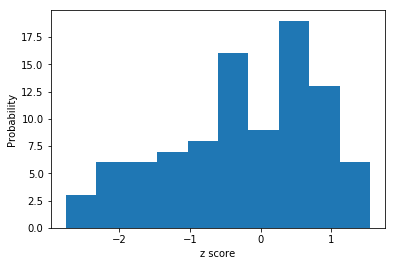

In [20]:
plt.hist(values)
plt.xlabel('z score')
plt.ylabel('Probability')
plt.show()

In [21]:
values_raw = []

for key in rawRed.keys():
    
    values_raw.append(rawRed[key])
    
print values_raw

[0.75732005382066325, 0.69825893346028378, 0.72747752573274604, 0.73947367762754146, 0.70329708725936013, 0.67376823973976185, 0.75701460342293247, 0.72725106809416695, 0.71991969996062022, 0.76162853222879701, 0.71556877691717502, 0.76592022641603041, 0.75079186795698682, 0.74704693727124349, 0.75836657586434741, 0.73397998911214846, 0.69449810366334219, 0.72886418598041158, 0.69612608885898253, 0.67532656696788018, 0.67094532075415969, 0.73950565541368063, 0.75448458521717265, 0.77248047922530616, 0.72556905348338396, 0.70675485151421813, 0.73450069127475304, 0.66522367687213724, 0.74647928290740495, 0.74965197789601268, 0.68672871804434421, 0.66330111625710331, 0.74001098915249031, 0.72974447547293952, 0.68600520705149248, 0.76846058918442639, 0.73952796729824488, 0.77491920322549457, 0.69282683997286132, 0.75631327022285089, 0.69889475019426317, 0.73564331489325174, 0.67163844918767457, 0.72076233615758878, 0.68739899499318424, 0.708696863262261, 0.76009249224644215, 0.649840017256

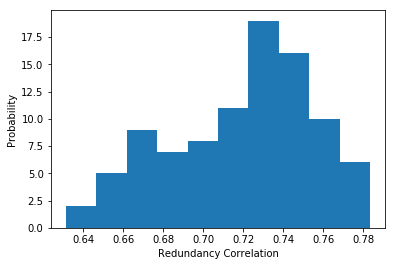

In [22]:
plt.hist(values_raw)
plt.xlabel('Redundancy Correlation')
plt.ylabel('Probability')
plt.show()